In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

ModuleNotFoundError: No module named 'wordcloud'

In [18]:
pip install wordcloud


     |████████████████████████████████| 366 kB 14.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
amz_reviews = pd.read_csv("https://erickutm.s3.amazonaws.com/1429_1.csv")


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
amz_reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [6]:
amz_reviews.describe()


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [7]:
amz_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

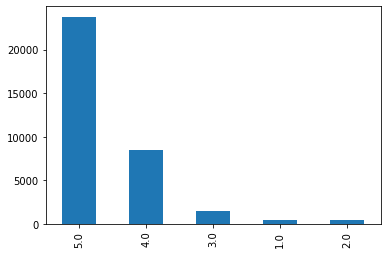

In [9]:
amz_reviews['reviews.rating'].value_counts().plot(kind='bar')


## Lowercasing
Before we move forward to calculate the sentiment scores for each review it is important to pre-process the textual data. Lowercasing helps in the process of normalization which is an important step to keep the words in a uniform manner (Welbers, et al., 2017, pp. 245-265).



In [10]:
amz_reviews.columns


Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [11]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']

In [12]:
df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))


In [13]:
df

,brand,categories,reviews.rating,reviews.text,reviews.username
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Adapter
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,truman
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,DaveZ
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,Shacks
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,explore42
...,...,...,...,...,...
34655,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",3.0,This is not appreciably faster than any other ...,Kris
34656,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,Amazon should include this charger with the Ki...,Jonathan Stewart
34657,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,Love my Kindle Fire but I am really disappoint...,J Lawson
34658,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,I was surprised to find it did not come with a...,Just the Buyer


## Homogeneizar mayusculas y minusculas

In [14]:
df['reviews.text'] = df['reviews.text'].astype(str)


In [15]:
df['reviews.text'][2]


'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [16]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [19]:
df['reviews.text'][2] ## to see the difference


'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

## Special characters
Special characters are non-alphabetic and non-numeric values such as {!,@#$%^ *()~;:/<>|+_-[]?}. Dealing with numbers is straightforward but special characters can be sometimes tricky. During tokenization, special characters create their own tokens and again not helpful for any algorithm, likewise, numbers.



In [20]:
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')


In [21]:
df['reviews.text'][2]


'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

## Stopwords
Stop-words being most commonly used in the English language; however, these words have no predictive power in reality. Words such as I, me, myself, he, she, they, our, mine, you, yours etc.



In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stop = stopwords.words('english')


In [24]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [25]:
df['reviews.text'][2]


'inexpensive tablet use learn step nabi thrilled learn skype already'

## Stemming
Stemming algorithm is very useful in the field of text mining and helps to gain relevant information as it reduces all words with the same roots to a common form by removing suffixes such as -action, ing, -es and -ses. However, there can be problematic where there are spelling errors.



In [26]:
st = PorterStemmer()


In [27]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [28]:
df['reviews.text'][2]


'inexpens tablet use learn step nabi thrill learn skype alreadi'

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

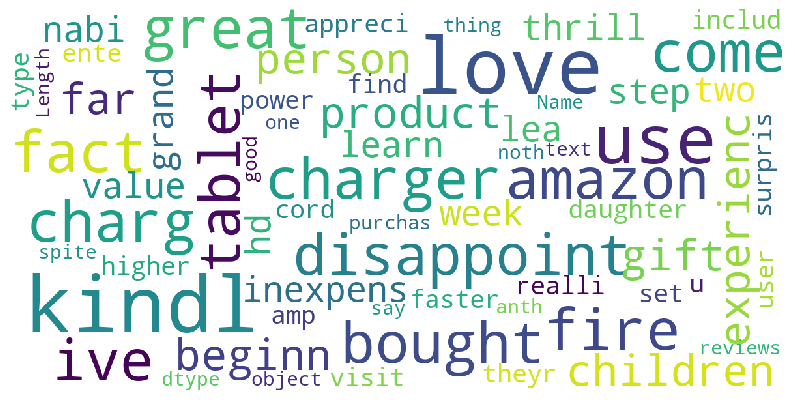

In [30]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['reviews.text'])

In [31]:
pip install TextBlob


     |████████████████████████████████| 636 kB 22.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
from textblob import TextBlob
statement = "expensive tablet"
sentiment1= TextBlob(statement).sentiment

In [33]:
def senti(x):
    return TextBlob(x).sentiment  
 
df['senti_score'] = df['reviews.text'].apply(senti)

In [34]:
df.senti_score.head()


0                                   (0.3, 0.8)
1                                (0.65, 0.675)
2                                   (0.0, 0.0)
3    (0.29545454545454547, 0.6492424242424243)
4                    (0.5, 0.5827777777777777)
Name: senti_score, dtype: object

In [35]:
df

,brand,categories,reviews.rating,reviews.text,reviews.username,senti_score
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,product far disappoint children love use like ...,Adapter,"(0.3, 0.8)"
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great beginn experienc person bought gift love,truman,"(0.65, 0.675)"
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,inexpens tablet use learn step nabi thrill lea...,DaveZ,"(0.0, 0.0)"
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,ive fire hd 8 two week love tablet great value...,Shacks,"(0.29545454545454547, 0.6492424242424243)"
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,bought grand daughter come visit set user ente...,explore42,"(0.5, 0.5827777777777777)"
...,...,...,...,...,...,...
34655,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",3.0,appreci faster 18 higher amp charger use kindl...,Kris,"(0.27499999999999997, 0.3461538461538462)"
34656,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,amazon includ charger kindl fact theyr charg u...,Jonathan Stewart,"(0.2, 0.39999999999999997)"
34657,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,love kindl fire realli disappoint kindl power ...,J Lawson,"(0.3111111111111111, 0.4222222222222222)"
34658,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,surpris find come type charg cord purchas one ...,Just the Buyer,"(0.0, 0.0)"
